# Data Selection and Exploration

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [1]:
import pandas as pd
complaints = pd.read_csv('../../../data/311-service-requests.csv', dtype='unicode')

#### Sanity Check

Before moving on it is a good idea to do a minimal sanity check of the complaints df.


# 1. What's even in it? (the summary)

When you print a large dataframe, it will only show you the first few rows.

If you don't see this, don't panic! The default behavior for large dataframes changed between pandas 0.12 and 0.13. Previous to 0.13 it would show you a summary of the dataframe. This includes all the columns, and how many non-null values there are in each column.

In [13]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

# 2. Selecting columns and rows

Here is a summary of the methods that can be used to select columns and rows in a df.



**Selecting Columns:**

1. **[By Column Label (Square Brackets)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#basics)**:
   - To select a single column, use square brackets with the column name as a string: `df['Column_Name']`.
   - Example: `df['Column1']` selects the 'Column1' in the DataFrame.

2. **[By Multiple Column Labels (Square Brackets)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#basics)**:
   - To select multiple columns, pass a list of column names within the square brackets: `df[['Column1', 'Column2']]`.
   - Example: `df[['Column1', 'Column2']]` selects both 'Column1' and 'Column2'.

3. **[By Column Label (Dot Notation)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#attribute-access)**:
   - If your column names are valid Python variable names (no spaces or special characters), you can use the dot notation: `df.Column_Name`.
   - Example: `df.Column1` selects the 'Column1' in the DataFrame.


**Selecting Rows:**

1. **[Basic Slicing by Row Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#slicing-ranges)**:
   - To select a range of rows by their integer positions, use the colon (`:`) notation. The format is `df[start_row:end_row]`.
   - Example: `df[1:4]` selects rows from position 1 to 3 (inclusive).

2. **[Slicing with a Step (Striding)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#slicing-ranges)**:
   - You can add a step size to skip rows. The format is `df[start_row:end_row:step`.
   - Example: `df[0:6:2]` selects every other row, starting from the first row and up to (but not including) the seventh row.

Lets demonstrate this based on the dataframe we loaded.

In [3]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [8]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [31]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [32]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 3. Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [10]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [34]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 4. Select and Explore


#### What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [35]:
complaints['Complaint Type'].value_counts()

HEATING                    14200
GENERAL CONSTRUCTION        7471
Street Light Condition      7117
DOF Literature Request      5797
PLUMBING                    5373
                           ...  
Trans Fat                      1
X-Ray Machine/Equipment        1
Ferry Permit                   1
DWD                            1
Snow                           1
Name: Complaint Type, Length: 165, dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

In [12]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: count, dtype: int64

But it gets better! We can plot them!

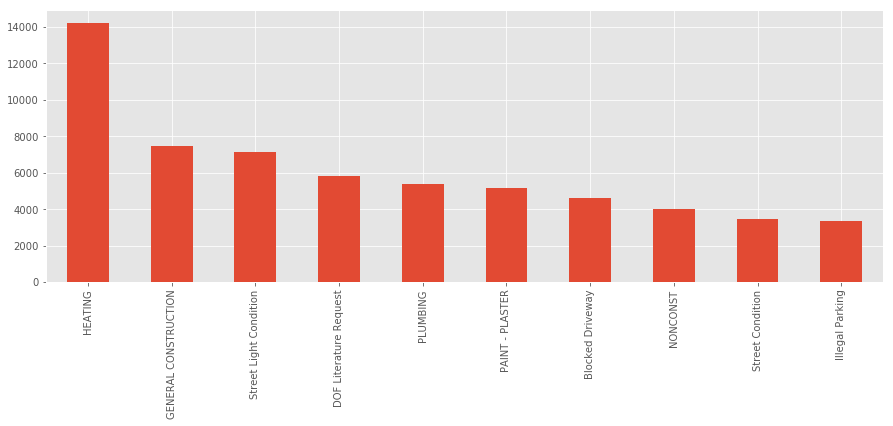

In [ ]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)
complaint_counts[:10].plot(kind='bar')

#### Exercise: Plot the most common Boroughs and Streets

Analog to the above plot the most common Boroughs and Streets

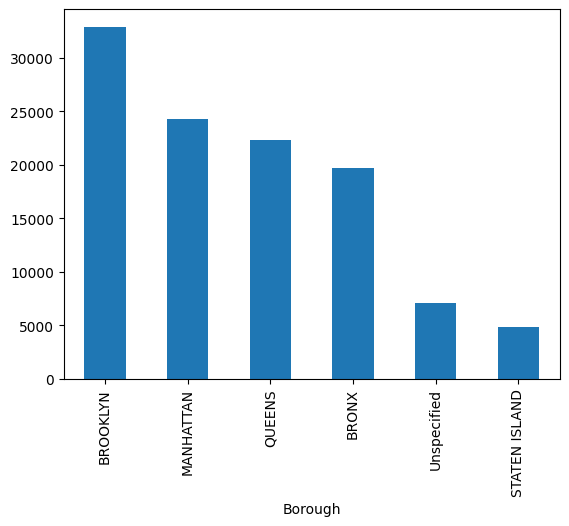

In [30]:
complaint_counts = complaints['Borough'].value_counts().plot(kind='bar')

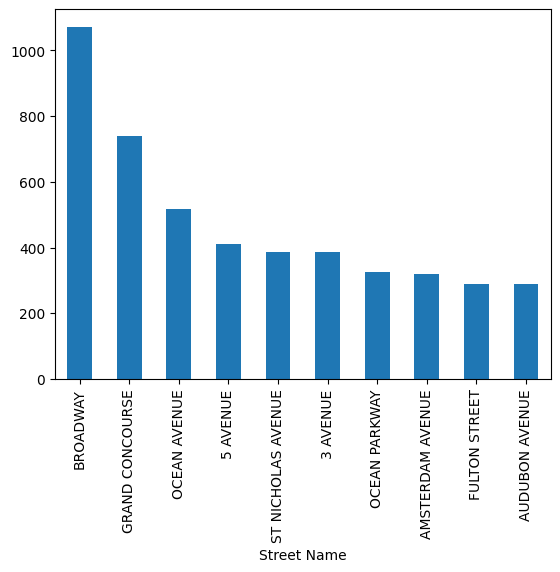

In [29]:
complaint_counts = complaints['Street Name'].value_counts()[:10].plot(kind='bar')

# 5. Selecting by Condition


**Simple Conditions**:
- To select rows based on a single condition, you can use the `loc` method with a boolean expression inside square brackets.
- Example: `df.loc[df['Column'] > 50]` selects all rows where the 'Column' values are greater than 50. [Read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)

**Multiple Conditions**:
- For more complex conditions, you can combine multiple conditions using logical operators (e.g., & for AND, | for OR).
- Example: `df.loc[(df['Column1'] > 50) & (df['Column2'] < 30)]` selects rows where 'Column1' is greater than 50 and 'Column2' is less than 30. [Read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)

**Negating Conditions**:
- To select rows that do not meet a condition, you can use the ~ operator.
- Example: `df.loc[~(df['Column'] == 'Value')]` selects rows where 'Column' is not equal to 'Value'. [Read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)

**Combining Complex Conditions**:
- You can nest conditions and combine them using parentheses to create complex queries.
- Example: `df.loc[(df['Column1'] > 50) & ((df['Column2'] == 'A') | (df['Column3'] < 10))]` selects rows where 'Column1' is greater than 50 and either 'Column2' is 'A' or 'Column3' is less than 10. [Read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)

**Selecting Specific Columns**:
- You can specify the columns you want to retrieve by including them as a list after the comma.
- Example: `df.loc[df['Column'] > 50, ['Column1', 'Column2']]` selects rows where 'Column' is greater than 50 and retrieves only 'Column1' and 'Column2' in the result. [Read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)

### Exercise: Select the subset of data for the Agency DOHMH

Use the loc approach to select the subset of data for the Agency DOHMH. 

In [42]:
complaints.loc[complaints["Agency"] == "DOHMH"]

'hello'

#### Exercise: Plot the most common Complaint Types for the Subset

Analog to the approach under 4. Select and Explore plot the most common Complaint Types for the subset.

In [48]:
complaints[complaints["Agency"] == "DOHMH", "Complaint Type"].value_counts().plot(kind='bar')

InvalidIndexError: (0         False
1         False
2         False
3         False
4          True
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Agency, Length: 111069, dtype: bool, ['Complaint Type'])